Authors:
- Anton PILHAGE
- Vyshnav THANIYIL CHANGATTU
- Henry LY

Objective:
- Physical analysis of model rooms with 7 concrete walls including insulation, 3 doors, 4 windows, and ventillations. 
- Model a controller for indoor temperature.

# Model
Here, we define the parameters required of the model and develop mathemtical model of the design.

## Elements of the thermal network

The thermal resistances for conduction are of the form:
$$R_{cd} = \frac{w}{\lambda S}$$
where:

- $w$ is the width of the material, m;
- $\lambda$ - thermal conductvity, W/m K;
- $S$ - surface area of the wall, m²

The thermals resistance for convection are of the form:
$$R_{cv} = \frac{1}{h S}$$
where:
- $h$ is the convection coefficient, W/m² K;
- $S$ - surface area of the wall, m².

The thermal capacities of the wall are of the form:
$$C_{wall}= \rho_{wall} c_{p, wall} w_{wall} S_{wall}$$

The thermal capacity of the air is:
$$C_{air} = \rho_{air} c_{air} V_{air}$$

The total shortwave incident irradiation on the wall $i$, $G_i$, may be estimated as a function of the direct solar irradiation incident on the surface of the walls, $G_{i}^{o}$:

$$S_i G_i = S_i G_{i}^{o} + \sum_{j=1}^{n} F_{j,i} S_j \rho_j G_j$$

where:
- $S_i$ is the area of the surface of the wall $i$ [m²];
- $G_i$ - total irradiation received directly and by mutiple reflections on surface $i$ [W/m²];
- $G_{i}^{o}$ - irradiance received directly from the sun on surface $i$ [W/m²];
- $F_{j, i}$ - view factor between surface $j$ and surface $i$, $0 ⩽ F_{j,i} ⩽ 1$;
- $\rho_j$ - reflectivity of surface $j$, $0 ⩽ \rho_j ⩽ 1$.


By taking into account the *reciprocity relation*: $S_i F_{i,j} = S_j F_{j,i}$, the previous equation becomes:

$$
\begin{bmatrix}
1 - \rho_1 F_{1,1} & - \rho_2 F_{1,2}     & ...  & - \rho_n F_{1,n}\\ 
- \rho_1 F_{2,1}   & 1 - \rho_2 F_{2,2}  & ...  & - \rho_n F_{2,n} \\ 
...                         & ...                            & ...  & ... \\ 
- \rho_1 F_{n,1}  & - \rho_2 F_{n,1}      & ... & 1 - \rho_n F_{n,n}
\end{bmatrix} \begin{bmatrix}
G_1\\ 
G_2\\ 
...\\ 
G_n
\end{bmatrix} = \begin{bmatrix}
G_{1}^{o}\\ 
G_{2}^{o}\\ 
...\\ 
G_{n}^{o}
\end{bmatrix}
$$

or

$$[I - \rho F] G = G^o$$

where:

- $I =\begin{bmatrix}
1 & 0 & ... & 0 \\ 
0 & 1 & ... & 0 \\ 
... & ... & ... & ...\\ 
0 & 0 & ... & 1 
\end{bmatrix}, $ is the identity matrix;

- $\rho = \begin{bmatrix}
\rho_1 & 0 & ... & 0\\ 
0 & \rho_2  & ... & 0 \\ 
... & ... & ... & ...\\ 
0 & 0 & ... & \rho_n 
\end{bmatrix}$ - matrix of reflexivities;

- $F = \begin{bmatrix}
F_{1,1} & F_{1,2} & ... & F_{1,n}\\ 
F_{2,1} & F_{2,2} & ... & F_{2,n} \\ 
... & ... & ... & ...\\ 
F_{n,1} & F_{n,2} & ... & F_{n,n}
\end{bmatrix}$ - matrix of view factors;

- $G = \begin{bmatrix}
G_1\\ 
G_2\\ 
...\\ 
G_n
\end{bmatrix}$ - vector of unknown total irradiances;

- $G^o = \begin{bmatrix}
G_{1}^{o}\\ 
G_{2}^{o}\\ 
...\\ 
G_{n}^{o}
\end{bmatrix}$ - vector of direct solar irradiances.

The unknown total irradiances are then
$$ G = [I - \rho F]^{-1} G^o$$

The radiative short wave (i.e. solar) heat flow rate on each surface is:
$$ \Phi = S G $$
where:
- $\Phi = \begin{bmatrix}
\Phi_1\\ 
\Phi_2\\ 
...\\ 
\Phi_n
\end{bmatrix}$ - vector of total heat flow rates due to solar radiation [W]; 

- $S =\begin{bmatrix}
S_1 & 0 & ... & 0 \\ 
0 & S_2 & ... & 0 \\ 
... & ... & ... & ...\\ 
0 & 0 & ... & S_n 
\end{bmatrix}$ - matrix of surface areas of walls $i$ [m²].

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Physical Analysis and Mathematical Modelling

We consider 2 rooms with 2 exterior doors and one interior door connecting two rooms, as well as 2 windows per each room, HVAC system and ventillation chambers.
\
Considering HVAC system controlled by a P - controller.
![thermal_circuit](Thermal_circuit.png)
> Thermal circuit.

In [2]:
# P-controler gain
Kp = 1e4

In [3]:
l_room = 3               # m length of the cubic room
Sg = l_room**2           # m² surface of the glass wall
Sc = Si = 5 * Sg    # m² surface of concrete & insulation of the 5 walls

In [4]:
Va = l_room**3           # m³ volume of air
ACH = 1             # air changes per hour
Va_dot = ACH * Va / 3600    # m³/s air infiltration

Thermophysical propwerties of air is given as:

In [5]:
air = {'Density': 1.2,                      # kg/m³
       'Specific heat': 1000}               # J/kg.K

Thermophysical properties and surface area of materials given below:

In [6]:
wall = {'Conductivity': [1.4, 0.027, 1.4],  # W/m.K
        'Density': [2300, 55, 2500],        # kg/m³
        'Specific heat': [880, 1210, 750],  # J/kg.K
        'Width': [0.2, 0.08, 0.004],
        'Surface': [5 * l_room**2, 5 * l_room**2, l_room**2],  # m²
        'Slices': [4, 2, 1]}                # number of discretizations
wall = pd.DataFrame(wall, index=['Concrete', 'Insulation', 'Glass'])

Radiative Properties of the surface:

In [7]:
ε_wLW = 0.9     # long wave wall emmisivity (concrete)
α_wSW = 0.2     # absortivity white surface
ε_gLW = 0.9     # long wave glass emmisivity (glass pyrex)
τ_gSW = 0.83    # short wave glass transmitance (glass)
α_gSW = 0.1     # short wave glass absortivity

σ = 5.67e-8     # W/m².K⁴ Stefan-Bolzmann constant

The view factor between the wall and the window (glass):

In [8]:
Fwg = 1 / 5     # view factor wall - glass

The mean temperature of the surfaces (used for the linearization of the radiative heat exchange) is:

In [9]:
Tm = 20 + 273   # mean temp for radiative exchange

# convection coefficients, W/m² K
h = pd.DataFrame([{'in': 4., 'out': 10}])

### Thermal Conductance


In [10]:
G_cd = wall['Conductivity'] / wall['Width'] * wall['Surface']

# Convection
Gw = h * wall['Surface'][0]     # wall
Gg = h * wall['Surface'][2]     # glass

# Long-wave radiation exchnage
GLW1 = ε_wLW / (1 - ε_wLW) * wall['Surface']['Insulation'] * 4 * σ * Tm**3
GLW2 = Fwg * wall['Surface']['Insulation'] * 4 * σ * Tm**3
GLW3 = ε_gLW / (1 - ε_gLW) * wall['Surface']['Glass'] * 4 * σ * Tm**3
# long-wave exg. wall-glass
GLW = 1 / (1 / GLW1 + 1 / GLW2 + 1 / GLW3)

# ventilation & advection
Gv = Va_dot * air['Density'] * air['Specific heat']

# glass: convection outdoor & conduction
Ggs = float(1 / (1 / Gg['out'] + 1 / (2 * G_cd['Glass'])))

### Thermal Capacities

In [11]:
C = wall['Density'] * wall['Specific heat'] * wall['Surface'] * wall['Width']
C['Air'] = air['Density'] * air['Specific heat'] * Va

### Incidence Matrix

In [12]:
A = np.zeros([25, 17])
A[0, 0] = 1
A[1, 0], A[1, 1] = -1, 1
A[2, 1], A[2, 2] = -1, 1
A[3, 2], A[3, 3] = -1, 1
A[4, 3], A[4, 4] = -1, 1
A[5, 4], A[5, 7] = -1, 1
A[6, 5] = 1
A[7, 5], A[7, 7] = -1, 1
A[8, 6] = 1
A[9, 6], A[9, 7] = -1, 1
A[10, 7] = 1
A[11, 7], A[11, 8] = -1, 1
A[12, 7], A[12, 9] = -1, 1
A[13, 8], A[13, 9] = 1, -1
A[14, 8], A[14, 10] = -1, 1
A[15, 10], A[15, 11] = -1, 1
A[16, 11], A[16, 12] = -1, 1
A[17, 12], A[17, 13] = -1, 1
A[18, 13], A[18, 14] = -1, 1
A[19, 14] = -1
A[20, 8], A[20, 15] = -1, 1
A[21, 15] = -1
A[22, 8], A[22, 16] = -1, 1
A[23, 16] = -1
A[24, 8] = -1

np.set_printoptions(suppress=False)
print(f'A = \n{A}')

A = 
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.]
 

In [13]:
G = np.diag([Gw.iloc[0]['out'], G_cd['Concrete'], G_cd['Concrete'], G_cd['Insulation'], G_cd['Insulation'], 
            Gg.iloc[0]['in'], Gw.iloc[0]['out'], G_cd['Glass'], Gw.iloc[0]['out'], Ggs, 
             Gv, Kp, G_cd['Concrete'], G_cd['Concrete'], Gg.iloc[0]['in'], 
              G_cd['Insulation'], G_cd['Insulation'], G_cd['Concrete'], G_cd['Concrete'], 
             Gw.iloc[0]['out'], G_cd['Glass'], Gw.iloc[0]['out'], Ggs, Gw.iloc[0]['out'], Gv
            ])

np.set_printoptions(precision=3, threshold=16, suppress=True)
with np.printoptions(threshold=np.inf):
    print(f'G: \n{G}')

G: 
[[  450.        0.        0.        0.        0.        0.        0.
      0.        0.        0.        0.        0.        0.        0.
      0.        0.        0.        0.        0.        0.        0.
      0.        0.        0.        0.   ]
 [    0.      315.        0.        0.        0.        0.        0.
      0.        0.        0.        0.        0.        0.        0.
      0.        0.        0.        0.        0.        0.        0.
      0.        0.        0.        0.   ]
 [    0.        0.      315.        0.        0.        0.        0.
      0.        0.        0.        0.        0.        0.        0.
      0.        0.        0.        0.        0.        0.        0.
      0.        0.        0.        0.   ]
 [    0.        0.        0.       15.187     0.        0.        0.
      0.        0.        0.        0.        0.        0.        0.
      0.        0.        0.        0.        0.        0.        0.
      0.        0.        0.        0. 

### Conductance Matrix

G = np.diag([Gw.iloc[0]['out'], Gw.iloc[0]['out'], Gw.iloc[0]['out'], Gw.iloc[0]['out'],
             Gw.iloc[0]['out'], Gw.iloc[0]['out'], Gw.iloc[0]['out'], 2 * G_cd['Concrete'], 
             2 * G_cd['Concrete'], 2 * G_cd['Concrete'], 
             2 * G_cd['Concrete'], 2 * G_cd['Concrete'], 2 * G_cd['Concrete'],
             2 * G_cd['Concrete'], 2 * G_cd['Concrete'],
             2 * G_cd['Insulation'], 2 * G_cd['Insulation'], 2 * G_cd['Insulation'],
             GLW, Gw.iloc[0]['in'], Gg.iloc[0]['in'], Ggs,
             2 * G_cd['Glass'], Gv, Kp])
# 2*G means 2 sides of the surface

np.set_printoptions(precision=3, threshold=16, suppress=True)
with np.printoptions(threshold=np.inf):
    print(f'G: \n{G}')

### Capacity Matrix

In [14]:
C = np.diag([0, C['Concrete'], 0, C['Concrete'], 0, 0, 0, 0,
             0, C['Concrete'], 0, C['Concrete'], 0, C['Concrete'], 0, 0, 0])
with np.printoptions(threshold=np.inf):
    print(C)

[[       0.        0.        0.        0.        0.        0.        0.
         0.        0.        0.        0.        0.        0.        0.
         0.        0.        0.]
 [       0. 18216000.        0.        0.        0.        0.        0.
         0.        0.        0.        0.        0.        0.        0.
         0.        0.        0.]
 [       0.        0.        0.        0.        0.        0.        0.
         0.        0.        0.        0.        0.        0.        0.
         0.        0.        0.]
 [       0.        0.        0. 18216000.        0.        0.        0.
         0.        0.        0.        0.        0.        0.        0.
         0.        0.        0.]
 [       0.        0.        0.        0.        0.        0.        0.
         0.        0.        0.        0.        0.        0.        0.
         0.        0.        0.]
 [       0.        0.        0.        0.        0.        0.        0.
         0.        0.        0.        0.  

### Input Vector

If the flow in a source is from low potential to high potential (i.e. from - to +), the source is positive 🔗 . Let's give some arbitrary non-zero values to the temperature sources:

In [15]:
b = np.zeros(25)
b[[0, 6, 8, 18, 19, 20, 21, 22]] = 10 + np.array([0, 60, 80, 180, 190, 200, 210, 220])

In [16]:
f = np.zeros(17) # 17 Nodes
f[[0, 4, 7, 8, 10, 14]] = 1000 + np.array([0, 4000, 7000, 8000, 10000, 14000])

In [17]:
y = np.ones(17)

In [18]:
u = np.hstack([b[np.nonzero(b)], f[np.nonzero(f)]])
u

array([   10.,    70.,    90.,   190.,   200.,   210.,   220.,   230.,
        1000.,  5000.,  8000.,  9000., 11000., 15000.])

## State-Space Representation
-- Explanation --

In [19]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 22 09:58:49 2021

@author: cghiaus

Import functions for EPW data files.
Adapted from
https://github.com/pvlib/pvlib-python/blob/master/pvlib/iotools/epw.py
"""

import numpy as np
import pandas as pd
import sys


def tc2ss(A, G, b, C, f, y):
    """
        Parameters
        ----------
        A : TYPE np.array
            adjancecy (TC connection ) matrix:
            #rows = #heat flow rates; #cols = #temperature nodes

        G : TYPE np.array
            square diagonal matrix of conductances
            #rows = #heat flow rates (or resistances)

        b : TYPE np.array
            vector indicating the presence of temperature sources on branches:
                1 for branches with temperature sources, otherwise 0
        C : TYPE np.array
            square diagonal matrix of capacities
        f : TYPE np.array
            vector indicating the presence of flow sources in nodes:
                1 for nodes with heat sources, otherwise 0
        y : TYPE np.array
            vector indicating the temperatures in the outputs:
                1 for output nodes, otherwise 0

        Returns
        -------
        As state matrix in state equation
        Bs input matrix in state equation
        Cs output matrix in observation equation
        Ds input matrix in observation equation
        Idx{1} nodes with capacities
            {2} branches with temp. sources
            {3} nodes with flow sources
            {4} nodes output temperatures

    """

    rC = np.nonzero(np.diag(C))[0]          # rows of non-zero elements in C
    r0 = np.nonzero(np.diag(C) == 0)[0]     # rows of zero elements in C
    # idx_nonzero = {'C': rC,
    #                'b': np.nonzero(b)[0],
    #                'f': np.nonzero(f)[0],
    #                'y': np.nonzero(y)[0]}

    if rC.size == 0:
        sys.exit('Error in dm4bem.tc2ss: capacity C matrix is zero')

    CC = np.diag(C[np.nonzero(C)])
    K = -A.T @ G @ A

    K11 = K[r0, :][:, r0]
    K12 = K[r0, :][:, rC]
    K21 = K[rC, :][:, r0]
    K22 = K[rC, :][:, rC]

    Kb = A.T @ G
    Kb1 = Kb[r0, :]
    Kb2 = Kb[rC, :]

    # State equation
    As = np.linalg.inv(CC) @ (
        -K21 @ np.linalg.inv(K11) @ K12 + K22)
    Bs = np.linalg.inv(CC) @ np.hstack([
        -K21 @ np.linalg.inv(K11) @ Kb1 + Kb2,
        -K21 @ np.linalg.inv(K11),
        np.eye(CC.shape[0])])
    # re-arragne B s in order of f-sources
    # index B for sources [b f0 fC]
    idx_new = np.hstack([np.arange(b.size), b.size + r0, b.size + rC])
    Bs[:, idx_new] = np.array(Bs)
    # indexes of effective inputs [b f]
    inp = np.hstack([np.nonzero(b)[0], A.shape[0] + np.nonzero(f)[0]])
    # extract actual inputs (inputs <> 0)
    Bs = Bs[:, inp]

    # Ds if outputs are all states
    Ds = np.zeros([y[rC].size, np.hstack([b, f]).size])

    # observation equation for outputs that are not states
    Cso = -np.linalg.inv(K11) @ K12
    Dso = -np.linalg.inv(K11) @ np.hstack(
        [Kb1, np.eye(r0.size), np.zeros([r0.size, CC.shape[0]])])

    # observation equation for any output
    Cx = np.zeros([y.size, As.shape[0]])
    Cs = np.diag(y[rC])
    Cx[rC, :] = Cs
    Cx[r0, :] = Cso
    Cs = Cx[np.nonzero(y)[0], :]

    Dx = np.zeros([y.size, np.hstack([b, f]).shape[0]])
    Dx[r0, :] = Dso     # feed-through if no capacity
    Dx[:, idx_new] = np.array(Dx)   # rearange in order of f-sources
    Ds = Dx[np.nonzero(y)[0], :][:, inp]

    return As, Bs, Cs, Ds


# ===========================================================================
def sol_rad_tilt_surf(weather_data, surface_orientation, albedo):
    """
    Created on Fri Sep 10 11:04:48 2021
    @author: cghiaus

    Calculate solar radiation on a tilted surface from weathear data obtained
    from `*.epw` file.

    Parameters
    ----------
    weather_data : DataFrame
        Index : datetime64
        Column names :
            'temp_air' : dry bulb temperature at the time indicated, °C
            'dir_n_rad' : direct normal radiation during last 60 min, Wh/m²
            'dif_h_rad' : diffuse horizontal rad. during last 60 min, Wh/m²

    surface_orientation : dictionary
        'slope' : slope or tilt angle in deg: [0 180];
                    90°- vertical; > 90°- downward facing
        'azimuth' : surface azimuth in deg: [-180 180];
                    0-south; west-positive
        'latitude' : local latitude in deg: [-90 90],
                    north positive, south negative

    albedo : float
        diffuse reflection of solar radiation

    Returns
    -------
    solar_rad_tilt : DataFrame
        Index : datetime64
        Column names :
            'direct' : direct radiation on the surface, Wh/m²
            'diffuse' : diffuse radiation on the surface, Wh/m²
            'reflected' : reflected radiation on the surface, Wh/m²

    References
    ----------

    1. [Duffie 2020] J.A. Duffie, W. A. Beckman, N. Blair (2020) Solar
    Engineering of Thermal Processes, 5th ed. John Wiley & Sons, Inc.
    ISBN 9781119540281

    2. [Th-CE 2005] Réglementation Thermique 2005. Méthode de calcul Th-CE.
    Annexe à l’arrêté du 19 juillet 2006
    """
    B = surface_orientation['slope']
    Z = surface_orientation['azimuth']
    L = surface_orientation['latitude']

    # Transform degrees in radians
    B = B * np.pi / 180
    Z = Z * np.pi / 180
    L = L * np.pi / 180

    n = weather_data.index.dayofyear

    # [Duffie 2020] eq. 1.6.1a
    # [Th-CE] §11.2.1.1, eq. (78)
    declination_angle = 23.45 * np.sin(360 * (284 + n) / 365 * np.pi / 180)
    d = declination_angle * np.pi / 180

    # [Duffie 2020] Example 1.6.1
    hour = weather_data.index.hour
    minute = weather_data.index.minute + 60
    hour_angle = 15 * ((hour + minute / 60) - 12)
    h = hour_angle * np.pi / 180

    # [Duffie 2020] incidence angle eq. 1.6.2
    # [Th-CE 2005] §11.2.1.1
    theta = np.sin(d) * np.sin(L) * np.cos(B)
    theta -= np.sin(d) * np.cos(L) * np.sin(B) * np.cos(Z)
    theta += np.cos(d) * np.cos(L) * np.cos(B) * np.cos(h)
    theta += np.cos(d) * np.sin(L) * np.sin(B) * np.cos(Z) * np.cos(h)
    theta += np.cos(d) * np.sin(B) * np.sin(Z) * np.sin(h)
    theta = np.array(np.arccos(theta))
    theta[theta > (np.pi / 2)] = np.pi / 2

    # Direct radiation on a wall
    # [Th-CE 2005] §11.2.1.1
    dir_rad = weather_data["dir_n_rad"] * np.cos(theta)
    dir_rad[dir_rad < 0] = 0

    # Diffuse radiation on a wall
    # [Th-CE 2005] §11.2.1.2, Eq. 79, p. 31
    dif_rad = weather_data["dif_h_rad"] * (1 + np.cos(B)) / 2

    # Solar radiation reflected by the ground
    # [Th-CE 2005] §112.1.3, after eq. (78)
    gamma = np.cos(d) * np.cos(L) * np.cos(h)
    gamma += np.sin(d) * np.sin(L)
    gamma = np.array(np.arcsin(gamma))
    gamma[gamma < 1e-5] = 1e-5

    # Radiation reflected by the ground
    # [Th-CE 2005] §11.2.1.3 eq. (80)
    # direct radiation on horizontal surface
    dir_h_rad = weather_data["dir_n_rad"] * np.sin(gamma)
    # total reflected radiation
    ref_rad = (dir_h_rad + weather_data["dif_h_rad"]) * albedo
    # reflected radiation eceived by the wall
    ref_rad *= (1 - np.cos(B) / 2)

    solar_rad_tilt = pd.DataFrame({'direct': dir_rad,
                                   'diffuse': dif_rad,
                                   'reflected': ref_rad})
    return solar_rad_tilt


def read_epw(filename, coerce_year=None):
    '''
    Read an EPW file into a pandas dataframe.

    Note that values contained in the metadata dictionary are unchanged
    from the EPW file.

    EPW files are commonly used by building simulation professionals
    and are widely available on the web. For example via:
    https://energyplus.net/weather , http://climate.onebuilding.org or
    http://www.ladybug.tools/epwmap/


    Parameters
    ----------
    filename : String
        Can be a relative file path or absolute file path.

    coerce_year : None or int, default None
        If supplied, the year of the data will be set to this value. This can
        be a useful feature because EPW data is composed of data from
        different years.
        Warning: EPW files always have 365*24 = 8760 data rows;
        be careful with the use of leap years.


    Returns
    -------
    data : DataFrame
        A pandas dataframe with the columns described in the table
        below. For more detailed descriptions of each component, please
        consult the EnergyPlus Auxiliary Programs documentation [1]_

    metadata : dict
        The site metadata available in the file.

    See Also
    --------
    pvlib.iotools.parse_epw

    Notes
    -----

    The returned structures have the following fields.

    ===============   ======  =========================================
    key               format  description
    ===============   ======  =========================================
    loc               String  default identifier, not used
    city              String  site loccation
    state-prov        String  state, province or region (if available)
    country           String  site country code
    data_type         String  type of original data source
    WMO_code          String  WMO identifier
    latitude          Float   site latitude
    longitude         Float   site longitude
    TZ                Float   UTC offset
    altitude          Float   site elevation
    ===============   ======  =========================================


    +-------------------------------+-----------------------------------------+
    | EPWData field                 | description                             |
    +===============================+=========================================+
    | index                         | A pandas datetime index. NOTE, times are|
    |                               | set to local standard time (daylight    |
    |                               | savings is not included). Days run from |
    |                               | 0-23h to comply with PVLIB's convention.|
    +-------------------------------+-----------------------------------------+
    | year                          | Year, from original EPW file. Can be    |
    |                               | overwritten using coerce function.      |
    +-------------------------------+-----------------------------------------+
    | month                         | Month, from original EPW file.          |
    +-------------------------------+-----------------------------------------+
    | day                           | Day of the month, from original EPW     |
    |                               | file.                                   |
    +-------------------------------+-----------------------------------------+
    | hour                          | Hour of the day from original EPW file. |
    |                               | Note that EPW's convention of 1-24h is  |
    |                               | not taken over in the index dataframe   |
    |                               | used in PVLIB.                          |
    +-------------------------------+-----------------------------------------+
    | minute                        | Minute, from original EPW file. Not     |
    |                               | used.                                   |
    +-------------------------------+-----------------------------------------+
    | data_source_unct              | Data source and uncertainty flags. See  |
    |                               | [1]_, chapter 2.13                      |
    +-------------------------------+-----------------------------------------+
    | temp_air                      | Dry bulb temperature at the time        |
    |                               | indicated, deg C                        |
    +-------------------------------+-----------------------------------------+
    | temp_dew                      | Dew-point temperature at the time       |
    |                               | indicated, deg C                        |
    +-------------------------------+-----------------------------------------+
    | relative_humidity             | Relative humidity at the time indicated,|
    |                               | percent                                 |
    +-------------------------------+-----------------------------------------+
    | atmospheric_pressure          | Station pressure at the time indicated, |
    |                               | Pa                                      |
    +-------------------------------+-----------------------------------------+
    | etr                           | Extraterrestrial horizontal radiation   |
    |                               | recv'd during 60 minutes prior to       |
    |                               | timestamp, Wh/m^2                       |
    +-------------------------------+-----------------------------------------+
    | etrn                          | Extraterrestrial normal radiation recv'd|
    |                               | during 60 minutes prior to timestamp,   |
    |                               | Wh/m^2                                  |
    +-------------------------------+-----------------------------------------+
    | ghi_infrared                  | Horizontal infrared radiation recv'd    |
    |                               | during 60 minutes prior to timestamp,   |
    |                               | Wh/m^2                                  |
    +-------------------------------+-----------------------------------------+
    | ghi                           | Direct and diffuse horizontal radiation |
    |                               | recv'd during 60 minutes prior to       |
    |                               | timestamp, Wh/m^2                       |
    +-------------------------------+-----------------------------------------+
    | dir_n_rad                     | Amount of direct normal radiation       |
    |                               | (modeled) recv'd during 60 minutes prior|
    |                               | to timestamp, Wh/m^2                    |
    +-------------------------------+-----------------------------------------+
    | dif_h_rad                     | Amount of diffuse horizontal radiation  |
    |                               | recv'd during 60 minutes prior to       |
    |                               | timestamp, Wh/m^2                       |
    +-------------------------------+-----------------------------------------+
    | global_hor_illum              | Avg. total horizontal illuminance recv'd|
    |                               | during the 60 minutes prior to          |
    |                               | timestamp, lx                           |
    +-------------------------------+-----------------------------------------+
    | direct_normal_illum           | Avg. direct normal illuminance recv'd   |
    |                               | during the 60 minutes prior to          |
    |                               | timestamp, lx                           |
    +-------------------------------+-----------------------------------------+
    | diffuse_horizontal_illum      | Avg. horizontal diffuse illuminance     |
    |                               | recv'd during the 60 minutes prior to   |
    |                               | timestamp, lx                           |
    +-------------------------------+-----------------------------------------+
    | zenith_luminance              | Avg. luminance at the sky's zenith      |
    |                               | during the 60 minutes prior to          |
    |                               | timestamp, cd/m^2                       |
    +-------------------------------+-----------------------------------------+
    | wind_direction                | Wind direction at time indicated,       |
    |                               | degrees from north (360 = north; 0 =    |
    |                               | undefined,calm)                         |
    +-------------------------------+-----------------------------------------+
    | wind_speed                    | Wind speed at the time indicated, m/s   |
    +-------------------------------+-----------------------------------------+
    | total_sky_cover               | Amount of sky dome covered by clouds or |
    |                               | obscuring phenomena at time stamp,      |
    |                               | tenths of sky                           |
    +-------------------------------+-----------------------------------------+
    | opaque_sky_cover              | Amount of sky dome covered by clouds or |
    |                               | obscuring phenomena that prevent        |
    |                               | observing the sky at time stamp, tenths |
    |                               | of sky                                  |
    +-------------------------------+-----------------------------------------+
    | visibility                    | Horizontal visibility at the time       |
    |                               | indicated, km                           |
    +-------------------------------+-----------------------------------------+
    | ceiling_height                | Height of cloud base above local terrain|
    |                               | (7777=unlimited), meter                 |
    +-------------------------------+-----------------------------------------+
    | present_weather_observation   | Indicator for remaining fields: If 0,   |
    |                               | then the observed weather codes are     |
    |                               | taken from the following field. If 9,   |
    |                               | then missing weather is assumed.        |
    +-------------------------------+-----------------------------------------+
    | present_weather_codes         | Present weather code, see [1], chapter  |
    |                               | 2.9.1.28                                |
    +-------------------------------+-----------------------------------------+
    | precipitable_water            | Total precipitable water contained in a |
    |                               | column of unit cross section from earth |
    |                               | to top of atmosphere, cm. Note that some|
    |                               | old_TMY3.epw files may have incorrect   |
    |                               | unit if it was retrieved from           |
    |                               | www.energyplus.net.                     |
    +-------------------------------+-----------------------------------------+
    | aerosol_optical_depth         | The broadband aerosol optical depth per |
    |                               | unit of air mass due to extinction by   |
    |                               | aerosol component of atmosphere,        |
    |                               | unitless                                |
    +-------------------------------+-----------------------------------------+
    | snow_depth                    | Snow depth in centimeters on the day    |
    |                               | indicated, (999 = missing data)         |
    +-------------------------------+-----------------------------------------+
    | days_since_last_snowfall      | Number of days since last snowfall      |
    |                               | (maximum value of 88, where 88 = 88 or  |
    |                               | greater days; 99 = missing data)        |
    +-------------------------------+-----------------------------------------+
    | albedo                        | The ratio of reflected solar irradiance |
    |                               | to global horizontal irradiance,        |
    |                               | unitless                                |
    +-------------------------------+-----------------------------------------+
    | liquid_precipitation_depth    | The amount of liquid precipitation      |
    |                               | observed at indicated time for the      |
    |                               | period indicated in the liquid          |
    |                               | precipitation quantity field,           |
    |                               | millimeter                              |
    +-------------------------------+-----------------------------------------+
    | liquid_precipitation_quantity | The period of accumulation for the      |
    |                               | liquid precipitation depth field, hour  |
    +-------------------------------+-----------------------------------------+


    References
    ----------

    .. [1] `EnergyPlus documentation, Auxiliary Programs
       <https://energyplus.net/documentation>`_
    '''

    # Assume it's accessible via the file system
    csvdata = open(str(filename), 'r')
    try:
        data, meta = parse_epw(csvdata, coerce_year)
    finally:
        csvdata.close()
    return data, meta


def parse_epw(csvdata, coerce_year=None):
    """
    Given a file-like buffer with data in Energy Plus Weather (EPW) format,
    parse the data into a dataframe.

    Parameters
    ----------
    csvdata : file-like buffer
        a file-like buffer containing data in the EPW format

    coerce_year : None or int, default None
        If supplied, the year of the data will be set to this value. This can
        be a useful feature because EPW data is composed of data from
        different years.
        Warning: EPW files always have 365*24 = 8760 data rows;
        be careful with the use of leap years.

    Returns
    -------
    data : DataFrame
        A pandas dataframe with the columns described in the table
        below. For more detailed descriptions of each component, please
        consult the EnergyPlus Auxiliary Programs documentation
        available at: https://energyplus.net/documentation.

    metadata : dict
        The site metadata available in the file.

    See Also
    --------
    pvlib.iotools.read_epw
    """
    # Read line with metadata
    firstline = csvdata.readline()

    head = ['loc', 'city', 'state-prov', 'country', 'data_type', 'WMO_code',
            'latitude', 'longitude', 'TZ', 'altitude']
    meta = dict(zip(head, firstline.rstrip('\n').split(",")))

    meta['altitude'] = float(meta['altitude'])
    meta['latitude'] = float(meta['latitude'])
    meta['longitude'] = float(meta['longitude'])
    meta['TZ'] = float(meta['TZ'])

    colnames = ['year', 'month', 'day', 'hour', 'minute', 'data_source_unct',
                'temp_air', 'temp_dew', 'relative_humidity',
                'atmospheric_pressure', 'etr', 'etrn', 'ghi_infrared', 'ghi',
                'dir_n_rad', 'dif_h_rad', 'global_hor_illum',
                'direct_normal_illum', 'diffuse_horizontal_illum',
                'zenith_luminance',
                'wind_direction', 'wind_speed', 'total_sky_cover',
                'opaque_sky_cover', 'visibility', 'ceiling_height',
                'present_weather_observation', 'present_weather_codes',
                'precipitable_water', 'aerosol_optical_depth', 'snow_depth',
                'days_since_last_snowfall', 'albedo',
                'liquid_precipitation_depth', 'liquid_precipitation_quantity']

    # We only have to skip 6 rows instead of 7 because we have already used
    # the realine call above.
    data = pd.read_csv(csvdata, skiprows=6, header=0, names=colnames)

    # Change to single year if requested
    if coerce_year is not None:
        data["year"] = coerce_year

    # create index that supplies correct date and time zone information
    dts = data[['month', 'day']].astype(str).apply(lambda x: x.str.zfill(2))
    hrs = (data['hour'] - 1).astype(str).str.zfill(2)
    dtscat = data['year'].astype(str) + dts['month'] + dts['day'] + hrs
    idx = pd.to_datetime(dtscat, format='%Y%m%d%H')
    idx = idx.dt.tz_localize(int(meta['TZ'] * 3600))
    data.index = idx

    return data, meta


In [20]:
[As, Bs, Cs, Ds] = tc2ss(A, G, b, C, f, y)

Let's compare the steady state results obtained with the differential-algebraic equations of the thermal circuit:
$$y_{tc} = (A^T G A)^{-1}(A^T G b + f)$$
and the state-space:
$$y_{ss} = (-C_s A_s^{-1} B_s + D_s) u$$ 

In [21]:
yss = (-Cs @ np.linalg.inv(As) @ Bs + Ds) @ u
ytc = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)

print(np.array_str(yss, precision=3, suppress_small=True))
print(np.array_str(ytc, precision=3, suppress_small=True))
print(f'Max error in steady-state between thermal circuit and state-space:\
 {max(abs(yss - ytc)):.2e}')

[  12.271   12.339   12.408 ... -159.674   39.491   15.904]
[  12.271   12.339   12.408 ... -159.674   39.491   15.904]
Max error in steady-state between thermal circuit and state-space: 3.69e-13


## Dynamic Simulation

In [22]:
b = np.zeros(25)
f = np.zeros(17)

f[[0, 4, 5, 7, 8, 12]] = 1
b[[0, 6, 7, 16, 17, 18]] = 1

Let's consider the output of the circuit temperature to be the indoor(Room 2) temperature(node 7)

In [23]:
y = np.zeros(17)
y[[5]] = 1

The state-space representation is obtained from the differential-algebraic equations of the thermal circuit:

In [24]:
[As, Bs, Cs, Ds] = tc2ss(A, G, b, C, f, y)

### Time Step

The maximum time step for numerical stability of Euler explicit itegration in time is given by the minimum eigenvalue $\lambda$ of the state matrix $A_s$:

$$ \Delta t \leq \min (-2 / \lambda_i) = \min T_i/2$$

where $T_i$ is the time constants, $T_i = - \frac{1}{\lambda_i} $

In [25]:
# Assume:
dtmax = min(-2. / np.linalg.eig(As)[0])
print(f'Maximum time step: {dtmax:.2f} s')

Maximum time step: 95166.46 s


In [26]:
dt = 5000

### Step response

Let's obtain the dynamic response of the system to a step input. For the duration of simulation:

In [27]:
duration = 3600 * 24 * 4        # [s]
n = int(np.floor(duration / dt))
t = np.arange(0, n * dt, dt)    # time

In [28]:
n

69

For the input vector **u**, the outdoor temperatures will be `To = 1`, the indoor set-point temperature will `Tsp =0`, and the heat flow sources will be zero. 

In [29]:
# Vectors of state and input (in time)
n_tC = As.shape[0]              # no of state variables (temps with capacity)
# u = [To To To Tsp Phio Phii Qaux Phia]
u = np.zeros([12, n])
u[0:8, :] = np.ones([8, n])

In [30]:
temp_exp = np.zeros([n_tC, t.shape[0]])
temp_imp = np.zeros([n_tC, t.shape[0]])

By integrating the state-space model
$$\left\{\begin{array}{rr}
\dot{\theta}=A_s \theta + B_s u\\ 
y = C_s \theta + D_s u
\end{array}\right.$$
by using Euler forward (or explicit)
$$ \theta_{k+1} = (I + \Delta t A) \theta _k + \Delta t B u_k $$
and Euler backward (or implicit) integration
$$\theta_{k+1} = (I - \Delta t A)^{-1} ( \theta _k + \Delta t B u_k )$$

In [31]:
I = np.eye(n_tC)
for k in range(n - 1):
    temp_exp[:, k + 1] = (I + dt * As) @ temp_exp[:, k] + dt * Bs @ u[:, k]
    temp_imp[:, k + 1] = np.linalg.inv(I - dt * As) @ (temp_imp[:, k] + dt * Bs @ u[:, k])


In [32]:
u.shape

(12, 69)

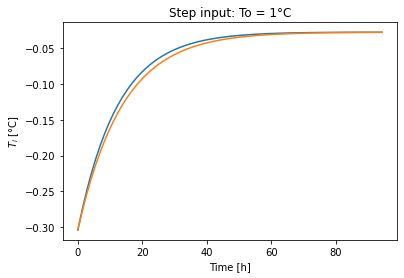

In [33]:
y_exp = Cs @ temp_exp + Ds @  u
y_imp = Cs @ temp_imp + Ds @  u

fig, ax = plt.subplots()
ax.plot(t / 3600, y_exp.T, t / 3600, y_imp.T)
ax.set(xlabel='Time [h]',
       ylabel='$T_i$ [°C]',
       title='Step input: To = 1°C')
plt.show()

In [34]:
b = np.zeros(25)
b[[0, 6, 7, 16, 17, 18]] = 1
f = np.zeros(17)

ytc = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)
print('Steady-state indoor temperature obtained with:')
print(f'- DAE model: {ytc[6]:.4f} °C')
print(f'- response to step input:{float(y_exp[:, -2]):.4f} °C')

Steady-state indoor temperature obtained with:
- DAE model: 0.1355 °C
- response to step input:-0.0276 °C


### Simulation with weather data

Read the hourly weather data file from start date to end date. The data are for a year (the choice of 2000 for the year is arbitrary).

In [35]:
filename = 'FRA_Lyon.074810_IWEC.epw'
start_date = '2000-01-03 12:00:00'
end_date = '2000-02-05 18:00:00'

# Read weather data from Energyplus .epw file
[data, meta] = read_epw(filename, coerce_year=None)
weather = data[["temp_air", "dir_n_rad", "dif_h_rad"]]
del data
weather.index = weather.index.map(lambda t: t.replace(year=2000))
weather = weather[(weather.index >= start_date) & (
    weather.index < end_date)]

From weather data, calculate the hourly solar radiation on a tilted surface, `Φt1` [W]:

In [36]:
surface_orientation = {'slope': 90,
                       'azimuth': 0,
                       'latitude': 45}
albedo = 0.2
rad_surf1 = sol_rad_tilt_surf(weather, surface_orientation, albedo)
rad_surf1['Φt1'] = rad_surf1.sum(axis=1)

The weather data is at the time-step of 1h. It needs to be at time step of `dt`. 

In [37]:
data = pd.concat([weather['temp_air'], rad_surf1['Φt1']], axis=1)
print(data)
data1 = data.resample(str(dt) + 'S').pad()
data1=data1[1:]
data1=data1.append(data.iloc[-1,:])
print(data1)
data = data.rename(columns={'temp_air': 'To'})

                           temp_air         Φt1
2000-01-03 12:00:00+01:00       6.8   98.949619
2000-01-03 13:00:00+01:00       8.0  171.364399
2000-01-03 14:00:00+01:00      10.0  164.029026
2000-01-03 15:00:00+01:00       9.0   97.877824
2000-01-03 16:00:00+01:00       8.0   13.300000
...                             ...         ...
2000-02-05 13:00:00+01:00      11.0  671.116452
2000-02-05 14:00:00+01:00      12.0  485.272692
2000-02-05 15:00:00+01:00      12.0  293.359833
2000-02-05 16:00:00+01:00      11.0  106.332549
2000-02-05 17:00:00+01:00      10.0    8.400000

[798 rows x 2 columns]
                           temp_air         Φt1
2000-01-03 12:30:00+01:00       6.8   98.949619
2000-01-03 13:53:20+01:00       8.0  171.364399
2000-01-03 15:16:40+01:00       9.0   97.877824
2000-01-03 16:40:00+01:00       8.0   13.300000
2000-01-03 18:03:20+01:00       4.9    0.000000
...                             ...         ...
2000-02-05 12:10:00+01:00      11.0  709.796200
2000-02-05 13:33

Let's consider the indoor temperature setpoint `Ti` and auxiliary heat flow `Qa` constant for the whole simulation period.

In [38]:
data['Ti'] = 20 * np.ones(data.shape[0])
data['Qa'] = 0 * np.ones(data.shape[0])

The simulation time vector, at time step `dt`is:

In [39]:
t = dt * np.arange(data.shape[0])

The input vector is formed by the temperature sources $\left [ T_o, T_o ,T_o, T_{i,sp} \right ]$ and the heat flow sources $\left [ \Phi_o, \Phi_i, \dot{Q_a}, \Phi_a \right ]$

In [40]:
u = pd.concat([data['To'], data['To'], data['To'], data['To'], data['To'], data['To'], data['To'],  
               data['Ti'],
               α_wSW * wall['Surface']['Concrete'] * data['Φt1'],
               τ_gSW * α_wSW * wall['Surface']['Glass'] * data['Φt1'],
               data['Qa'],
               α_gSW * wall['Surface']['Glass'] * data['Φt1']], axis=1)

In [41]:
print(u)

                             To    To    To    To    To    To    To    Ti  \
2000-01-03 12:00:00+01:00   6.8   6.8   6.8   6.8   6.8   6.8   6.8  20.0   
2000-01-03 13:00:00+01:00   8.0   8.0   8.0   8.0   8.0   8.0   8.0  20.0   
2000-01-03 14:00:00+01:00  10.0  10.0  10.0  10.0  10.0  10.0  10.0  20.0   
2000-01-03 15:00:00+01:00   9.0   9.0   9.0   9.0   9.0   9.0   9.0  20.0   
2000-01-03 16:00:00+01:00   8.0   8.0   8.0   8.0   8.0   8.0   8.0  20.0   
...                         ...   ...   ...   ...   ...   ...   ...   ...   
2000-02-05 13:00:00+01:00  11.0  11.0  11.0  11.0  11.0  11.0  11.0  20.0   
2000-02-05 14:00:00+01:00  12.0  12.0  12.0  12.0  12.0  12.0  12.0  20.0   
2000-02-05 15:00:00+01:00  12.0  12.0  12.0  12.0  12.0  12.0  12.0  20.0   
2000-02-05 16:00:00+01:00  11.0  11.0  11.0  11.0  11.0  11.0  11.0  20.0   
2000-02-05 17:00:00+01:00  10.0  10.0  10.0  10.0  10.0  10.0  10.0  20.0   

                                   Φt1          Φt1   Qa         Φt1  
2000

The initial value of the state-vector can be different of zero:

In [42]:
temp_exp = 20 * np.ones([As.shape[0], u.shape[0]])

In [43]:
temp_exp.shape

(5, 798)

Explicit Euler integration in time
$$ \theta_{k+1} = (I + \Delta t A) \theta _k + \Delta t B u_k $$

In [44]:
for k in range(u.shape[0] - 1):
    temp_exp[:, k + 1] = (I + dt * As) @ temp_exp[:, k]\
     + dt * Bs @ u.iloc[k, :]

yields the time variation of state variable $\theta$, from which we obtain the variation of the output (i.e. indoor temperature):
$$y = C_s \theta + D_s u$$
and the variation of the heat flow of the HVAC system:
$$q_{HVAC} = K_p (T_{i,sp} - y)$$
where $K_p$ is the gain of the P-controller and $T_{i,sp}$ is the HVAC-setpoint for the indoor temperature.

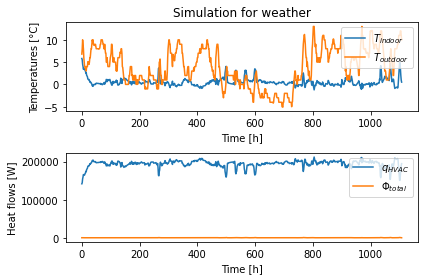

In [45]:
y_exp = Cs @ temp_exp + Ds @ u.to_numpy().T
q_HVAC = Kp * (data['Ti'] - y_exp[0, :])

fig, axs = plt.subplots(2, 1)
# plot indoor and outdoor temperature
axs[0].plot(t / 3600, y_exp[0, :], label='$T_{indoor}$')
axs[0].plot(t / 3600, data['To'], label='$T_{outdoor}$')
axs[0].set(xlabel='Time [h]',
           ylabel='Temperatures [°C]',
           title='Simulation for weather')
axs[0].legend(loc='upper right')

# plot total solar radiation and HVAC heat flow
axs[1].plot(t / 3600,  q_HVAC, label='$q_{HVAC}$')
axs[1].plot(t / 3600, data['Φt1'], label='$Φ_{total}$')
axs[1].set(xlabel='Time [h]',
           ylabel='Heat flows [W]')
axs[1].legend(loc='upper right')

fig.tight_layout()

In [46]:
print(Ds @ u.to_numpy().T)

[[-1.288 -1.088 -1.753 ... -1.352 -2.508 -2.968]]


In [47]:
print(Cs @ temp_exp)

[[7.102 6.628 6.265 ... 3.401 3.495 3.485]]


In [48]:
print(y_exp)

[[5.814 5.541 4.511 ... 2.049 0.987 0.517]]
